In [9]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 5

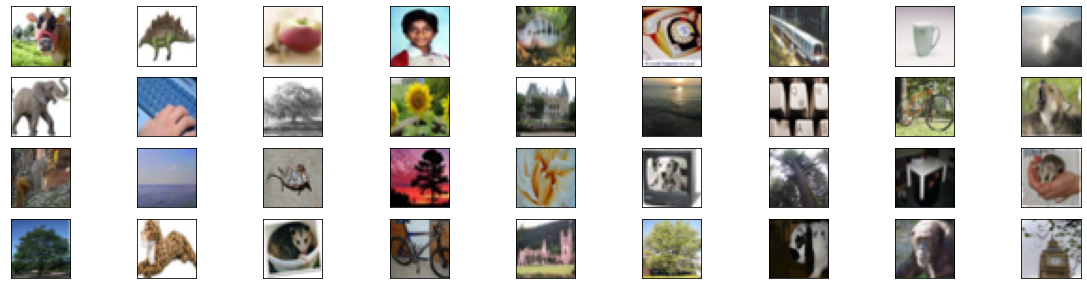

In [10]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

figure = plt.figure(figsize=(20,5))
for i in range(36):
    img = figure.add_subplot(4, 9, i+1, xticks=[], yticks=[])
    img.imshow(x_train[i])       

print(x_train.shape, y_train.shape) 
print(x_test.shape, y_test.shape)   

print(np.unique(y_train, return_counts = True)) 

x_train = x_train/255.0
x_test = x_test /255.0 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# 2. 모델


In [11]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(2,2), input_shape=(32,32,3), padding='same', activation='relu')) # output shape = 28, 28, 128
model.add(MaxPooling2D())                                                                                   # output shape = 14, 14, 128 
model.add(Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'))     
model.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu'))                    
model.add(Conv2D(filters=16, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D())                                                                                   # output shape = 14, 14, 128 
model.add(Conv2D(filters=8, kernel_size=(2,2), activation='relu'))
model.add(Flatten())
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=100, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        16448     
                                                                 
 conv2d_12 (Conv2D)          (None, 15, 15, 32)        8224      
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                  

# 3. 컴파일 및 훈련

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='acc') # one-hot encoding 하지 않아도 되는 데이터이므로 loss= sparse_categorical_crossentropy

path = 'C:/study/keras/keras_save/MCP/'
MCP = ModelCheckpoint(monitor='acc', mode='auto', save_best_only=True, filepath=path+'keras35_3_cifar100.hdf5') 
ES = EarlyStopping(monitor='acc', mode='auto', patience=4, restore_best_weights=True) 
model.fit(x_train, y_train, epochs=32, batch_size=1024, validation_split=0.2, callbacks=[ES, MCP])

Epoch 1/32
40/40 [==============================] - 4s 82ms/step - loss: 4.5958 - acc: 0.0144 - val_loss: 4.5645 - val_acc: 0.0184
Epoch 2/32
40/40 [==============================] - 3s 67ms/step - loss: 4.5080 - acc: 0.0211 - val_loss: 4.4342 - val_acc: 0.0267
Epoch 3/32
40/40 [==============================] - 3s 68ms/step - loss: 4.3296 - acc: 0.0427 - val_loss: 4.2771 - val_acc: 0.0462
Epoch 4/32
40/40 [==============================] - 3s 70ms/step - loss: 4.1537 - acc: 0.0625 - val_loss: 4.0807 - val_acc: 0.0710
Epoch 5/32
40/40 [==============================] - 3s 69ms/step - loss: 4.0091 - acc: 0.0834 - val_loss: 4.0206 - val_acc: 0.0886
Epoch 6/32
40/40 [==============================] - 3s 69ms/step - loss: 3.9228 - acc: 0.1001 - val_loss: 3.9161 - val_acc: 0.1042
Epoch 7/32
40/40 [==============================] - 3s 69ms/step - loss: 3.8356 - acc: 0.1140 - val_loss: 3.8537 - val_acc: 0.1121
Epoch 8/32
40/40 [==============================] - 3s 69ms/step - loss: 3.7701 - a

# 4. 평가 및 예측

In [13]:
metric = model.evaluate(x_test, y_test) # compile에서 metrics = acc를 지정했으므로 evaluate는 값을 배열 형태로 2개 반환함
print('loss: ', metric[0], 'acc: ', metric[1])

313/313 [==============================] - 1s 4ms/step - loss: 3.1798 - acc: 0.2258
loss:  3.1798012256622314 acc:  0.22579999268054962
